<a href="https://colab.research.google.com/github/Yogeshkumar170201/Stock-Prediction-Nifty/blob/main/EcoStockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# **Dataset (31 Mar, 2014 to 31 Oct, 2021)**

In [73]:
dataset = pd.read_csv("/content/dataset.csv")

In [74]:
dataset.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,01-Apr-14,6729.50,6732.25,6675.45,6721.05,147136671,7174.14
1,02-Apr-14,6757.60,6763.50,6723.60,6752.55,173335875,8007.75
2,03-Apr-14,6772.05,6776.75,6696.90,6736.10,197546648,7738.58
3,04-Apr-14,6741.85,6741.85,6685.15,6694.35,155127592,6676.88
4,07-Apr-14,6694.25,6725.15,6650.40,6695.05,133947319,6707.01


In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1870 non-null   object 
 1   Open               1870 non-null   float64
 2   High               1870 non-null   float64
 3   Low                1870 non-null   float64
 4   Close              1870 non-null   float64
 5   Shares Traded      1870 non-null   int64  
 6   Turnover (Rs. Cr)  1870 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 102.4+ KB


In [76]:
df = dataset.reset_index()['Close']

In [77]:
print(df)

0        6721.05
1        6752.55
2        6736.10
3        6694.35
4        6695.05
          ...   
1865    18125.40
1866    18268.40
1867    18210.95
1868    17857.25
1869    17671.65
Name: Close, Length: 1870, dtype: float64


In [78]:
print(df.shape)

(1870,)


In [79]:
dataset.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
1865,25-Oct-21,18229.50,18241.40,17968.50,18125.40,418703647,34572.34
1866,26-Oct-21,18154.50,18310.45,18099.30,18268.40,341377869,29764.61
1867,27-Oct-21,18295.85,18342.05,18167.90,18210.95,335248487,30823.75
1868,28-Oct-21,18187.65,18190.70,17799.45,17857.25,374205784,30222.34
1869,29-Oct-21,17833.05,17915.85,17613.10,17671.65,336466864,28136.00


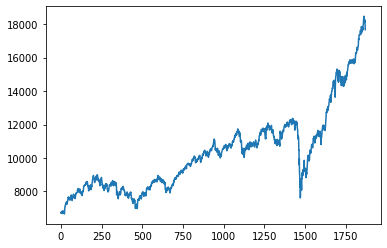

In [80]:
plt.plot(df)

# **Pre-Processing**

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1, 1))

In [83]:
print(df)

[[0.00579306]
 [0.00845702]
 [0.00706584]
 ...
 [0.97749588]
 [0.94758341]
 [0.93188718]]


# **Split Dataset into Train and Test**

In [84]:
train_size = int(len(df)*0.65)
test_size = len(df)-train_size

In [85]:
train_size, test_size

(1215, 655)

In [86]:
train_data = df[0:train_size, :]
test_data = df[train_size:len(df),:]

In [87]:
print(train_data)
print(test_data)

[[0.00579306]
 [0.00845702]
 [0.00706584]
 ...
 [0.35612077]
 [0.36660324]
 [0.37214681]]
[[0.37258658]
 [0.37065838]
 [0.38187661]
 [0.39313713]
 [0.39656222]
 [0.39669331]
 [0.40376337]
 [0.40675293]
 [0.41268975]
 [0.41172988]
 [0.40630471]
 [0.39762358]
 [0.40853313]
 [0.40530255]
 [0.41586959]
 [0.42042793]
 [0.42798004]
 [0.42212356]
 [0.41823756]
 [0.4239841 ]
 [0.41878726]
 [0.42449152]
 [0.41707895]
 [0.41812762]
 [0.42208127]
 [0.42604761]
 [0.43423401]
 [0.43132902]
 [0.41793733]
 [0.41637279]
 [0.42907523]
 [0.42194173]
 [0.43148548]
 [0.43093577]
 [0.42895683]
 [0.4278997 ]
 [0.4182587 ]
 [0.40977208]
 [0.39806334]
 [0.39318787]
 [0.39125122]
 [0.38019789]
 [0.3864434 ]
 [0.38094211]
 [0.38940759]
 [0.40209734]
 [0.43770984]
 [0.4276333 ]
 [0.43006892]
 [0.42323143]
 [0.43905028]
 [0.44587086]
 [0.44620914]
 [0.44048797]
 [0.44765952]
 [0.44570595]
 [0.45972346]
 [0.45406571]
 [0.43902068]
 [0.44129562]
 [0.44569749]
 [0.44932555]
 [0.44430208]
 [0.44496596]
 [0.43729122]


In [88]:
 def create_dataset(dataset, time_step=1):
   dataX, dataY = [], []
   for i in range(len(dataset)-time_step-1):
     a = dataset[i:(i+time_step), 0]
     dataX.append(a)
     dataY.append(dataset[i+time_step, 0])
   return np.array(dataX), np.array(dataY)

In [89]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [90]:
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[0.00579306 0.00845702 0.00706584 ... 0.10602985 0.10589877 0.10854582]
 [0.00845702 0.00706584 0.00353503 ... 0.10589877 0.10854582 0.11009345]
 [0.00706584 0.00353503 0.00359423 ... 0.10854582 0.11009345 0.11629667]
 ...
 [0.30985665 0.31252907 0.30855427 ... 0.35752463 0.35373589 0.35131295]
 [0.31252907 0.30855427 0.32200516 ... 0.35373589 0.35131295 0.35011628]
 [0.30855427 0.32200516 0.30293881 ... 0.35131295 0.35011628 0.35612077]]
[0.11009345 0.11629667 0.12097763 ... 0.35011628 0.35612077 0.36660324]
[[0.37258658 0.37065838 0.38187661 ... 0.37764388 0.36597319 0.36744048]
 [0.37065838 0.38187661 0.39313713 ... 0.36597319 0.36744048 0.35604465]
 [0.38187661 0.39313713 0.39656222 ... 0.36744048 0.35604465 0.36328809]
 ...
 [0.75467462 0.7643283  0.76262844 ... 0.97471775 0.96937291 0.9702609 ]
 [0.7643283  0.76262844 0.76951245 ... 0.96937291 0.9702609  0.98235443]
 [0.76262844 0.76951245 0.76853567 ... 0.9702609  0.98235443 0.97749588]]
[0.35604465 0.36328809 0.3554442  0.3704

In [91]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1114, 100)
(1114,)
(554, 100)
(554,)


In [92]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# **Stack LSTM Model**

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [94]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [95]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=6, batch_size=64, verbose=1)

Epoch 1/6
18/18 [==============================] - 9s 240ms/step - loss: 0.0116 - val_loss: 0.0433
Epoch 2/6
18/18 [==============================] - 3s 175ms/step - loss: 0.0016 - val_loss: 0.0094
Epoch 3/6
18/18 [==============================] - 3s 183ms/step - loss: 5.1729e-04 - val_loss: 0.0024
Epoch 4/6
18/18 [==============================] - 3s 190ms/step - loss: 3.9261e-04 - val_loss: 0.0036
Epoch 5/6
18/18 [==============================] - 3s 181ms/step - loss: 3.7760e-04 - val_loss: 0.0028
Epoch 6/6
18/18 [==============================] - 3s 176ms/step - loss: 3.7966e-04 - val_loss: 0.0030


In [97]:
import tensorflow as tf

In [98]:
tf.__version__

'2.6.0'

In [99]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [100]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [101]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train, train_predict))

9245.747973693235

In [102]:
math.sqrt(mean_squared_error(Y_test, test_predict))

12839.89494793921

In [103]:
look_back = 100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1,:] = test_predict

[]

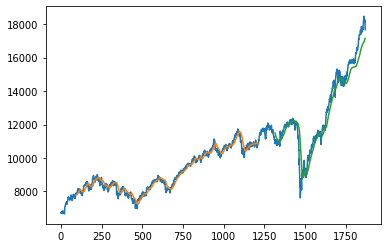

In [104]:
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.plot()

In [105]:
len(test_data)

655

In [106]:
x_input = test_data[555:].reshape(1, -1)
x_input.shape

(1, 100)

In [107]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [108]:
temp_input

[0.7685356674700833,
 0.759676941942577,
 0.7683369275656476,
 0.7735464501670261,
 0.7746035773182799,
 0.779457905196837,
 0.7708571186942365,
 0.7644171000887986,
 0.7637363102033913,
 0.7690769165715253,
 0.7712968835891582,
 0.7640407628229525,
 0.7727937756353335,
 0.7787052306651444,
 0.7748446023087657,
 0.7692418284071209,
 0.7669626622690177,
 0.7634530001268552,
 0.767021861389488,
 0.7765064061905366,
 0.7751448264197217,
 0.7803374349866802,
 0.7675039113704597,
 0.7642817878134381,
 0.7645185842953192,
 0.7746458624043301,
 0.7781639815637026,
 0.7841050361537486,
 0.7840373800160684,
 0.769575880586917,
 0.759402088883251,
 0.7756353334179035,
 0.778341578925113,
 0.7756691614867438,
 0.7690726880629203,
 0.7659393631866042,
 0.7717789335701298,
 0.7704765529197851,
 0.7808025709332319,
 0.8015730052010656,
 0.812402215738509,
 0.8154298278996998,
 0.8106600701932428,
 0.8123557021438538,
 0.8142035604042456,
 0.814385386274261,
 0.8213328259123006,
 0.8352615332572201,


In [109]:
lst_output = []
n_steps = 100
i = 0
while(i<30):
  if(len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape(1, -1)
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose = 0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1
print(lst_output)

[0.889928]
101
1 day input [0.75967694 0.76833693 0.77354645 0.77460358 0.77945791 0.77085712
 0.7644171  0.76373631 0.76907692 0.77129688 0.76404076 0.77279378
 0.77870523 0.7748446  0.76924183 0.76696266 0.763453   0.76702186
 0.77650641 0.77514483 0.78033743 0.76750391 0.76428179 0.76451858
 0.77464586 0.77816398 0.78410504 0.78403738 0.76957588 0.75940209
 0.77563533 0.77834158 0.77566916 0.76907269 0.76593936 0.77177893
 0.77047655 0.78080257 0.80157301 0.81240222 0.81542983 0.81066007
 0.8123557  0.81420356 0.81438539 0.82133283 0.83526153 0.83813269
 0.84249228 0.8386232  0.82861432 0.83250032 0.84333798 0.84418791
 0.8443782  0.85015434 0.86925451 0.8862658  0.8815341  0.89488773
 0.90245253 0.90703624 0.90570849 0.90498118 0.90631316 0.90513341
 0.90722229 0.9190156  0.92832255 0.92457186 0.90865153 0.92261406
 0.92131591 0.94468265 0.9472409  0.94740158 0.93839486 0.93524039
 0.92736268 0.92008119 0.93354476 0.94462768 0.92971796 0.94192566
 0.95079285 0.95508478 0.95897501 0

In [110]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [111]:
df1 = df.tolist()
df1.extend(lst_output)

In [112]:
len(df)

1870

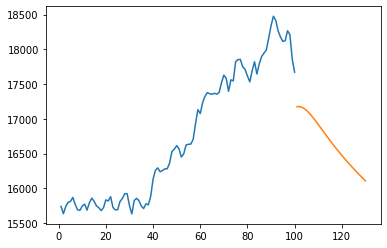

In [113]:
plt.plot(day_new, scaler.inverse_transform(df[1770:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

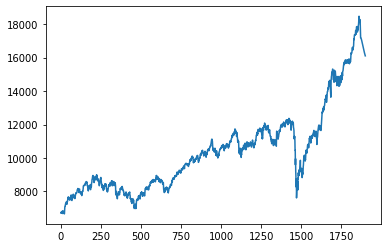

In [114]:
plt.plot(scaler.inverse_transform(df1))